## **MODELING**

In [2]:
# loaing libraries for modelling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os 

In [3]:
# loaad the processed data
df = pd.read_csv('/home/astrosanderson/Desktop/telecom-churn-prediction/data/processed/telecom_churn_processed.csv')

In [4]:
# preview the data
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,-0.439916,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,2505,0
1,3962,1,-0.439916,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,1466,0
2,2564,1,-0.439916,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,157,1
3,5535,1,-0.439916,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,1400,0
4,6511,0,-0.439916,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,925,1
5,6551,0,-0.439916,0,0,-0.992402,1,2,1,0,...,2,0,2,2,0,1,2,1.159546,6104,1
6,1002,1,-0.439916,0,1,-0.422317,1,2,1,0,...,0,0,2,0,0,1,1,0.808907,1550,0
7,4770,0,-0.439916,0,0,-0.910961,0,1,0,2,...,0,0,0,0,0,0,3,-1.163647,2609,0
8,5604,0,-0.439916,1,0,-0.177995,1,2,1,0,...,2,2,2,2,0,1,2,1.330711,2646,1
9,4534,1,-0.439916,0,1,1.206498,1,0,0,2,...,0,0,0,0,1,0,0,-0.286218,3022,0


### 1. *Train baseline: Logistic Regression*

/home/astrosanderson/Desktop/telecom-churn-prediction/telecom/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[942  94]
 [167 206]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



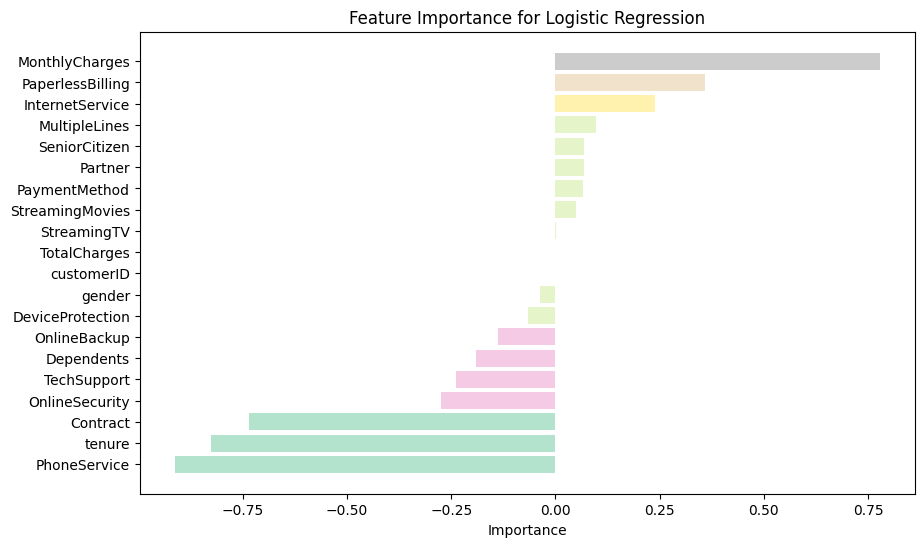

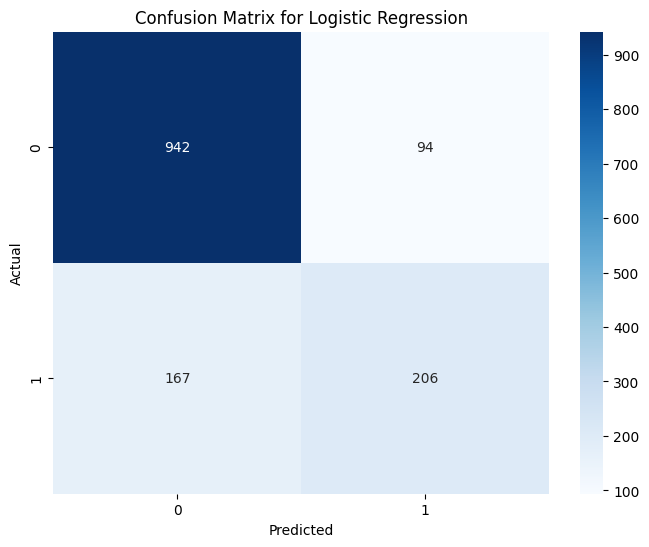

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Split the data into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)
# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# plotting feature importance
importance = logreg.coef_[0]
features = X.columns
sorted_indices = np.argsort(importance)
plt.figure(figsize=(10,6))
plt.barh(features[sorted_indices], importance[sorted_indices], color=plt.cm.Pastel2((importance[sorted_indices] - min(importance)) / (max(importance) - min(importance))))
plt.xlabel('Importance')
plt.title('Feature Importance for Logistic Regression')
plt.show()

# plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### 2. *Advanced: RandomForest*

Confusion Matrix for RandomForest:
[[939  97]
 [190 183]]

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



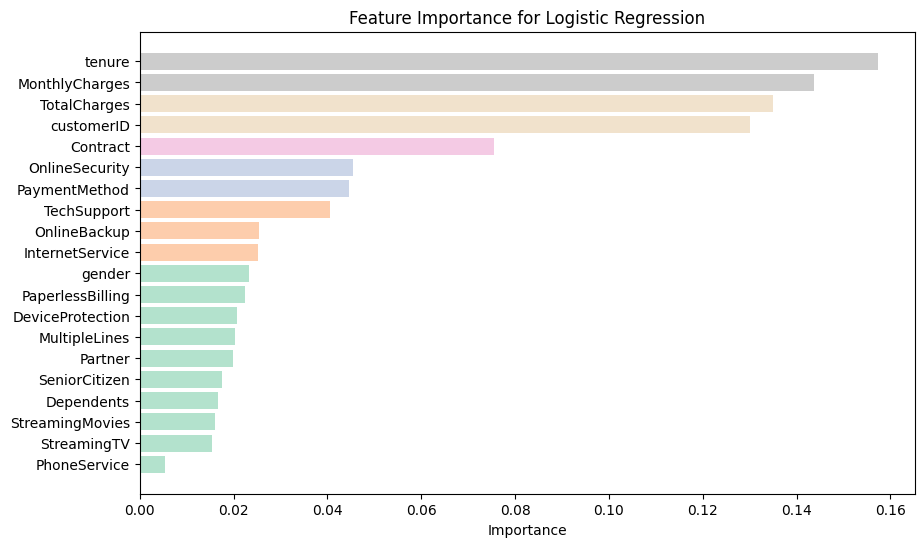

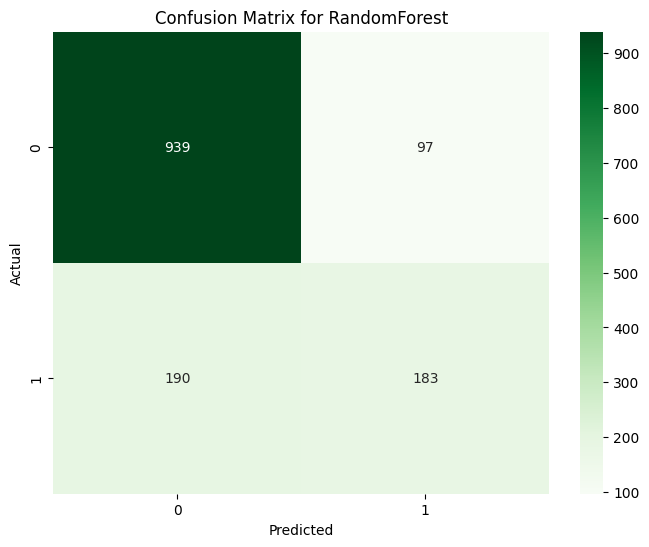

In [ ]:
# Train RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the RandomForest model
print("Confusion Matrix for RandomForest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for RandomForest:")
print(classification_report(y_test, y_pred_rf))

importance = rf.feature_importances_
features = X.columns
sorted_indices = np.argsort(importance)
plt.figure(figsize=(10,6))
plt.barh(features[sorted_indices], importance[sorted_indices], color=plt.cm.Pastel2((importance[sorted_indices] - min(importance)) / (max(importance) - min(importance))))
plt.xlabel('Importance')
plt.title('Feature Importance for Logistic Regression')
plt.show()

# plot confusion matrix for RandomForest
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForest')
plt.show()

### 3. *Advanced: XGBoost*

/home/astrosanderson/Desktop/telecom-churn-prediction/telecom/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:29:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix for XGBoost:
[[904 132]
 [169 204]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



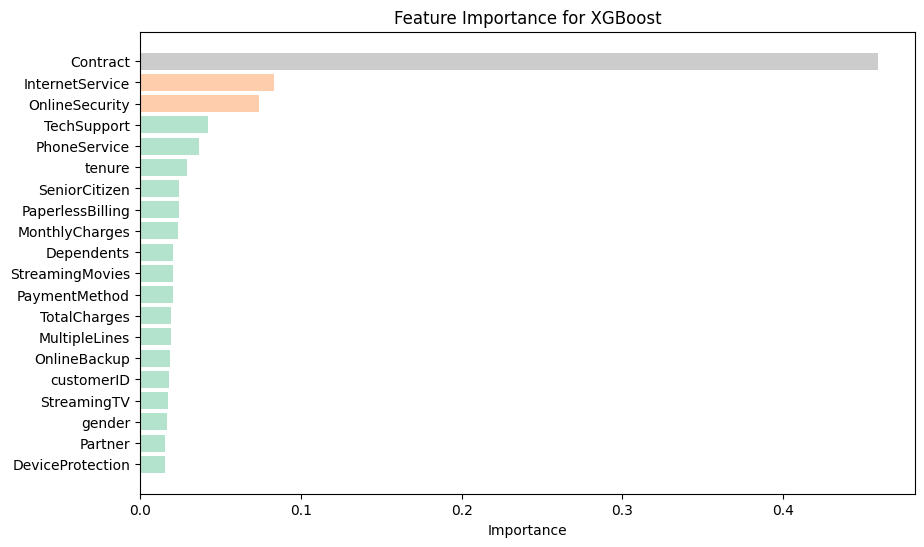

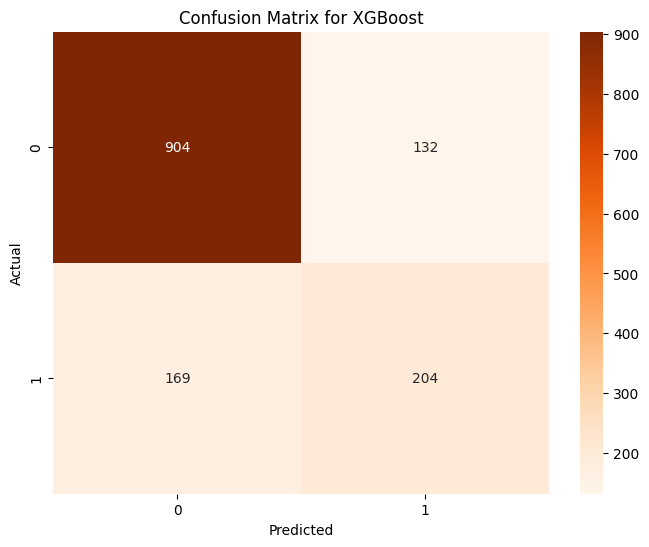

In [10]:
# Train XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# plotting feature importance for XGBoost
importance = xgb_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importance)
plt.figure(figsize=(10,6))
plt.barh(features[sorted_indices], importance[sorted_indices], color=plt.cm.Pastel2((importance[sorted_indices] - min(importance)) / (max(importance) - min(importance))))
plt.xlabel('Importance')
plt.title('Feature Importance for XGBoost')
plt.show() 

# plot confusion matrix for XGBoost
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

### *Summary of the Models*
* The Logistic Regression Model has got an overall accuracy of 0.81 and looking at the confusion matrix it has got lower false positives and false negatives compared to the other models.
* The RandomForest Model has got an overall accuracy of 0.80 which is very close to the baseline model, the confusion matrix is also not very far from the baseline model. looking at the confusion matrix we can see that the true negative and false postive are the same but the true posive has rediuced increading the false negative values. with a few optimizations in terms of the number of trees this model might be a better fit.
* The XGBoost Model has an overall accuracy of 0.79 which is the lowest performing model, looking at the confusion matrix we can see the true negative is the same but we have an increase the false positive and decrease in the false negative. This model isn't very bad as well it just needs a bit of tuning and it can be a good fit for the problem.


* **False Positive** means the people have not churned but the model predicts that they have churned.
* **False Negative** means the people have churned but the model predicts that they have not churned.
* **True Positive** means the people have churned and the model predicts it correctly.
* **True Negative** means the people have not churned and the model predicts it correctly.